In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import flg_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import flg_yolo

fast_mode = False
if fls.is_submission:
    fast_mode = False

MainProcess


In [2]:
data = fls.dill_load(fls.temp_dir + 'Baseline_0_1542ec49_504 _f.pickle')
ref_data = data.test_data

In [3]:
def show_cv(data, ref_data):
    main_cv = fls.score_competition_metric(data,ref_data)
    alt_cv = []
    for partial in fls.DataSelector().datasets:
        data_selector = fls.DataSelector()
        data_selector.datasets = [partial]
        alt_cv.append(fls.score_competition_metric(data_selector.select(data), data_selector.select(ref_data)))
    for ii in range(3):
        print(f'{main_cv[ii]:1.3} {alt_cv[0][ii]:1.3} {alt_cv[1][ii]:1.3} {alt_cv[2][ii]:1.3} {alt_cv[3][ii]:1.3}')

In [4]:
show_cv(data.inferred_test_data, ref_data)

0.821 0.674 1.0 1.0 1.0
0.46 0.984 0.7 0.52 0.162
0.504 0.901 0.745 0.575 0.195


In [5]:
# inds = np.arange(len(ref_data))
# np.random.default_rng(seed=0).shuffle(inds)
# inds = inds[:150]
# new_inferred = []
# new_ref = []
# for i in inds:
#     new_inferred.append(data.inferred_test_data[i])
#     new_ref.append(ref_data[i])
# show_cv(new_inferred, new_ref)
# data.trained_model.data_after_step2 = []
# data.trained_model.state = 1
# re_inferred = data.trained_model.infer(new_ref)
# print('')
# show_cv(re_inferred, new_ref)

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [7]:
data.trained_model.data_after_step2 = []
for d in data.inferred_test_data:
    data.trained_model.data_after_step2.append(d)

In [17]:
data_reinferred = data.trained_model.infer(data.test_data)
show_cv(data_reinferred, ref_data)

0.824 0.681 1.0 1.0 1.0
0.453 0.984 0.65 0.52 0.155
0.498 0.904 0.699 0.575 0.186


In [19]:
data_reinferred2 = copy.deepcopy(data_reinferred)
for (d,r) in zip(data_reinferred2,ref_data):
    if len(d.labels)==0 and not len(r.labels)==0:
        d.labels.loc[0,'z']=10000
        d.labels.loc[0,'y']=10000
        d.labels.loc[0,'x']=10000
        #print(d.labels)
show_cv(data_reinferred2, ref_data)

0.824 0.681 1.0 1.0 1.0
0.453 0.984 0.65 0.52 0.155
0.498 0.904 0.699 0.575 0.186


In [9]:
data.trained_model.step1Labels.confidence_threshold, data.trained_model.step1Labels.relative_confidence_threshold

(0.01, 0.2)

['tom', 'ycw', 'aba', 'mba']
Number of true positives before filter:  183  out of  300


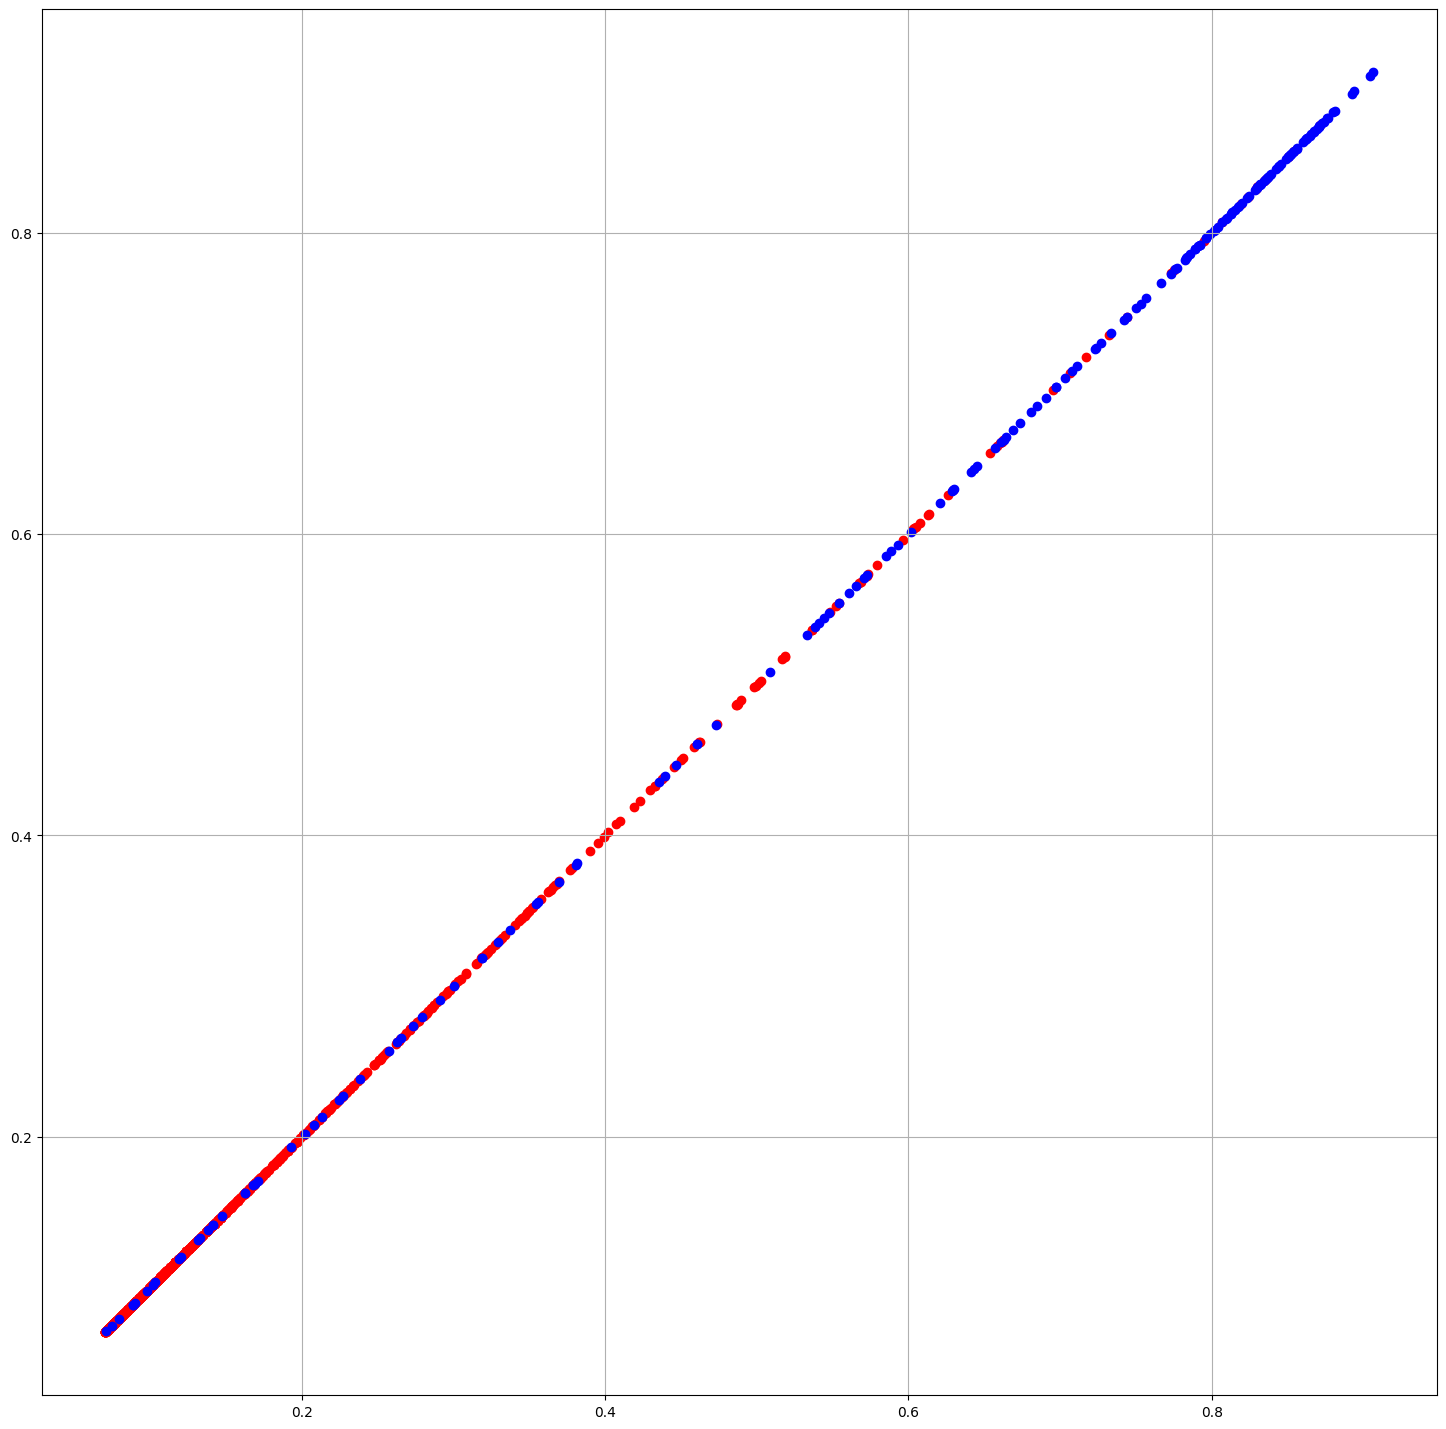

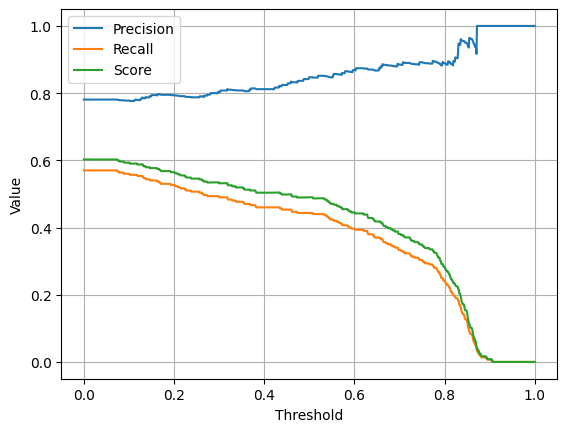

['tom']
Number of true positives before filter:  62  out of  63


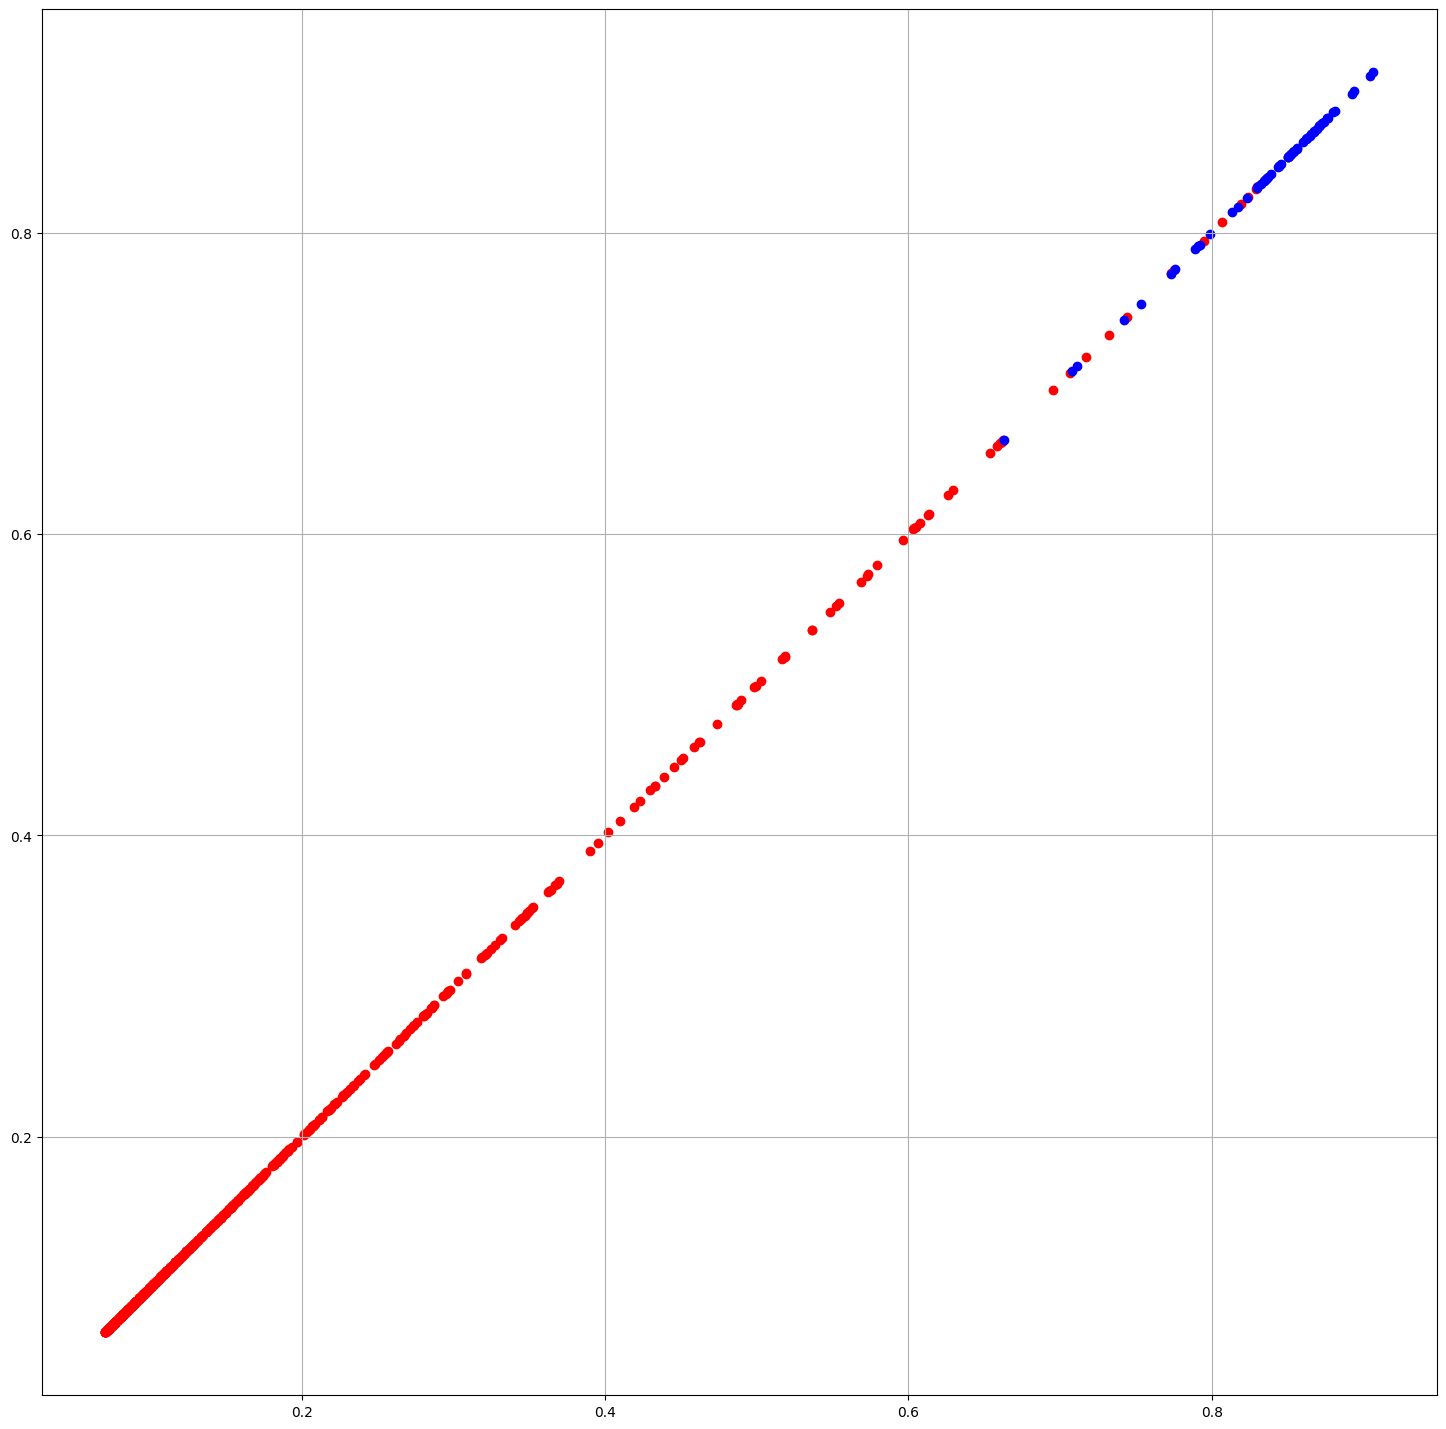

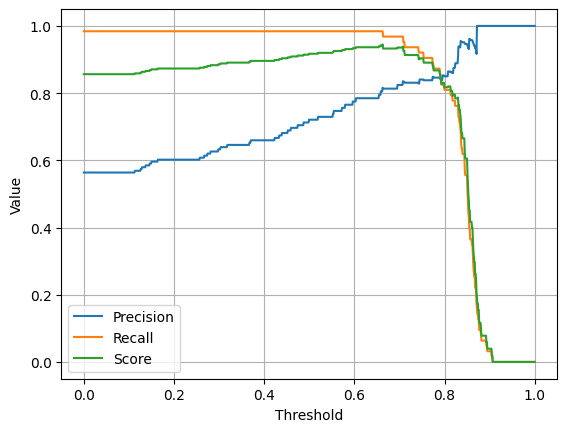

['ycw']
Number of true positives before filter:  18  out of  20


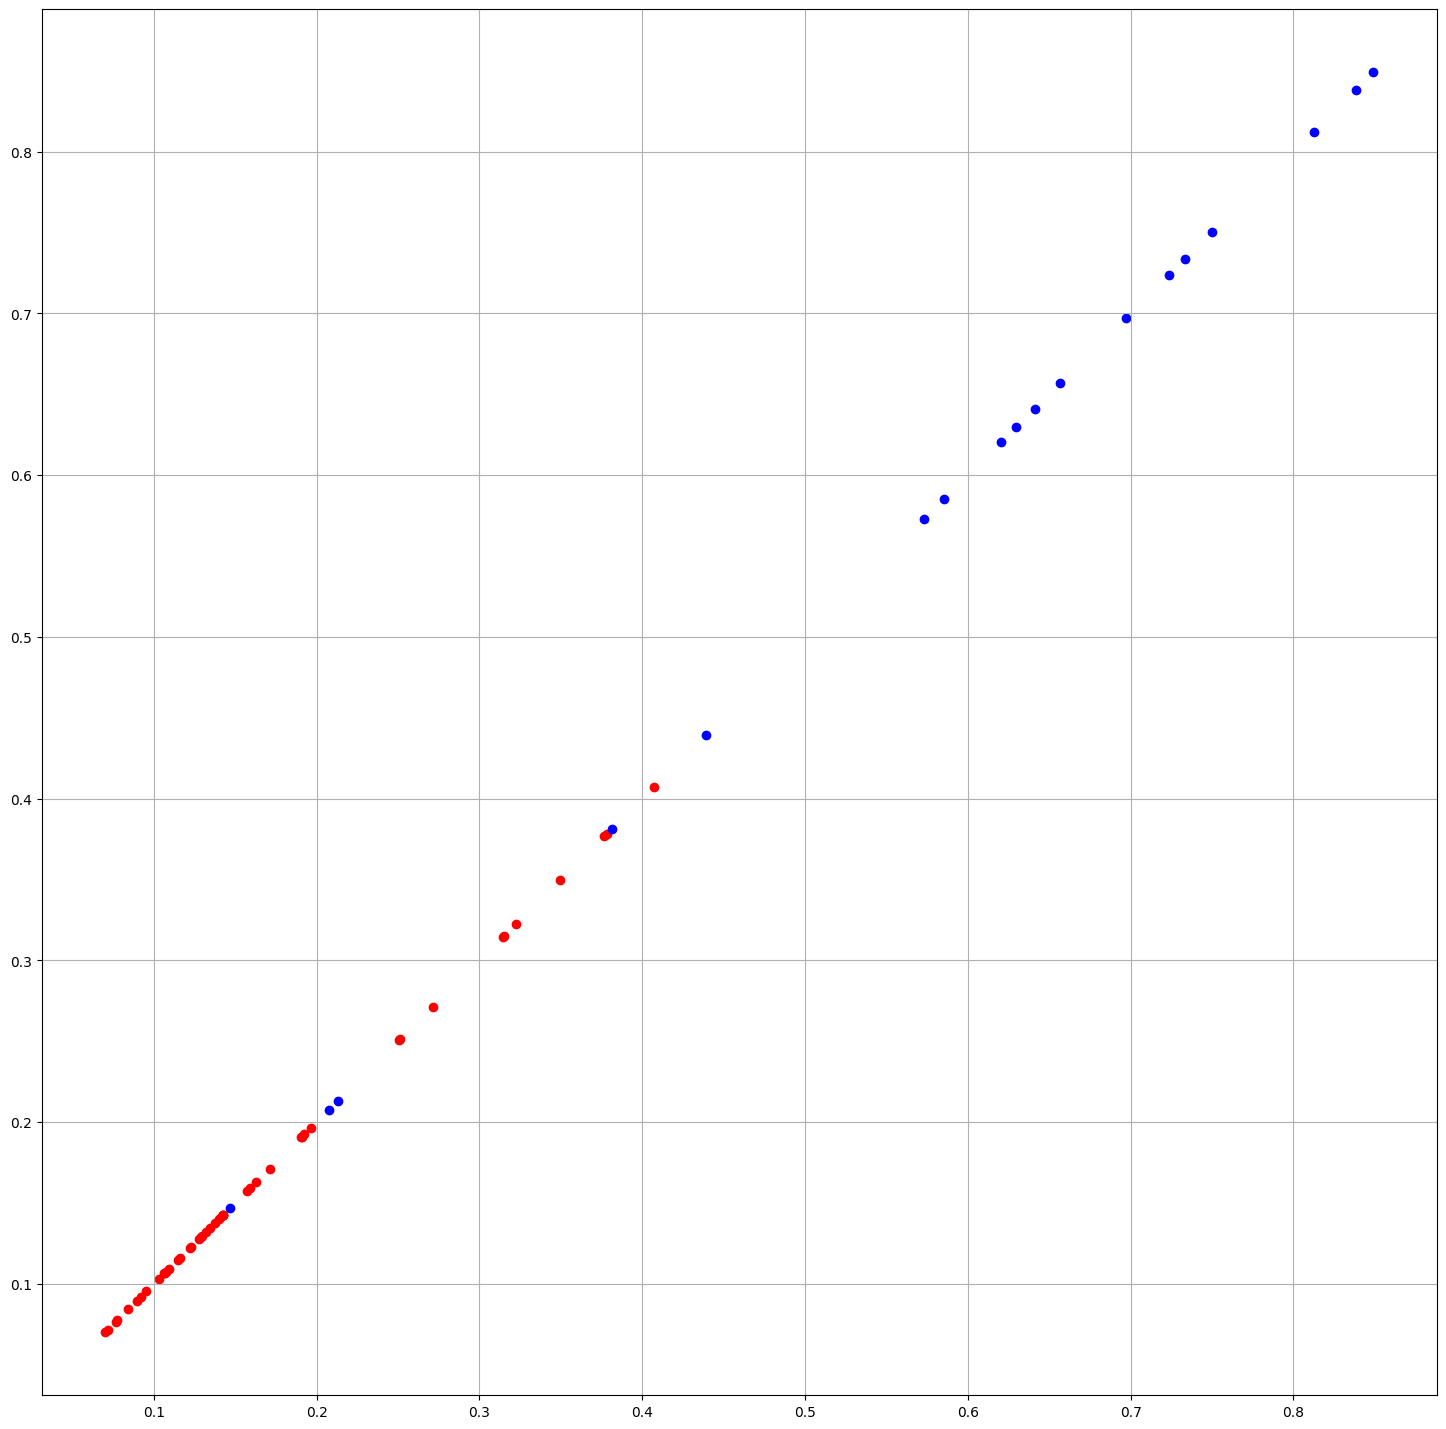

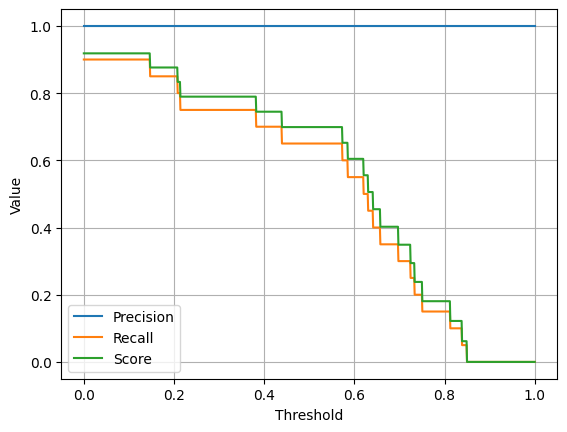

['aba']
Number of true positives before filter:  63  out of  75


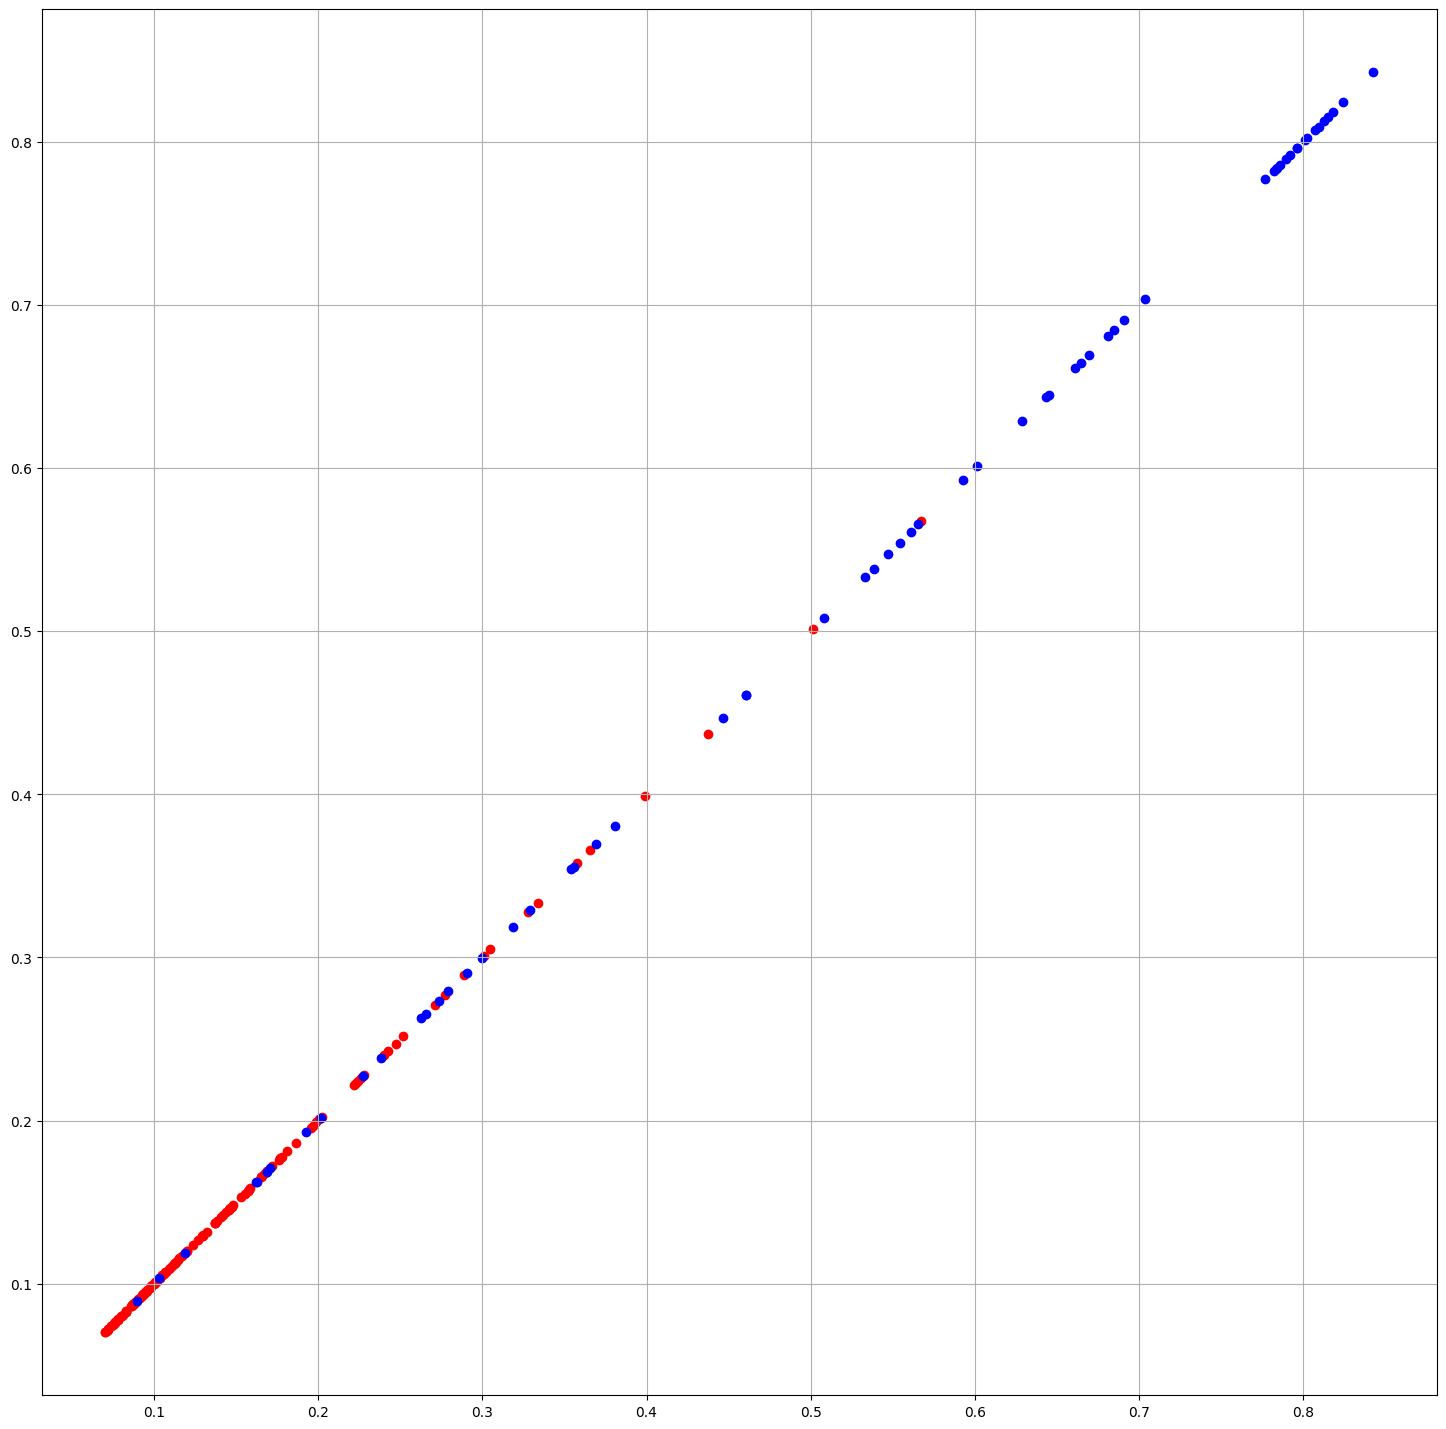

KeyboardInterrupt: 

In [10]:
importlib.reload(flg_model)
data.trained_model.state = 0
data.trained_model.calibrate_step_3 = True
for datasets in [['tom', 'ycw', 'aba', 'mba'], ['tom'], ['ycw'], ['aba'], ['mba']]:
    print(datasets)
    mod = copy.deepcopy(data.trained_model)
    mod.train_data_selector.datasets = datasets
    mod.train(data.test_data, data.test_data)

In [ ]:
data.trained_model.state = 0
data.trained_model.calibrate_step_3 = True
mod = copy.deepcopy(data.trained_model)
mod.train_data_selector.datasets = ['tom', 'ycw', 'aba', 'mba']
partial_data = []
for d in data.test_data:
    if d.voxel_spacing<12:
        partial_data.append(d)
mod.train(partial_data,partial_data)
mod = copy.deepcopy(data.trained_model)
mod.train_data_selector.datasets = ['tom', 'ycw', 'aba', 'mba']
partial_data = []
for d in data.test_data:
    if d.voxel_spacing>=12:
        partial_data.append(d)
mod.train(partial_data,partial_data)

In [ ]:
%debug


In [ ]:
mod = copy.copy(data.trained_model)
mod.state = 0
mod.data_after_step2 = []
mod.step1Labels.confidence_threshold = 0.05
mod.calibrate_step_3 = True
mod.train_data_selector.datasets = ['mba']
mod.train(data.test_data, data.test_data)

In [ ]:
mod = copy.copy(data.trained_model)
mod.state = 0
mod.data_after_step2 = []
mod.step1Labels.confidence_threshold = 0.001
mod.calibrate_step_3 = True
mod.train_data_selector.datasets = ['mba']
mod.train(data.test_data, data.test_data)

In [ ]:
mod = copy.copy(data.trained_model)
mod.state = 0
mod.data_after_step2 = []
mod.step1Labels.confidence_threshold = 0.001
mod.calibrate_step_3 = True
mod.train_data_selector.datasets = ['aba']
mod.train(data.test_data, data.test_data)